# Sound velocity BdG equations

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from multirods_gpe.style import set_base_style
from multirods_gpe import MultiRods
from multirods_gpe.bloch import ideal_eigen_states, GPEState, GPEStateSet
from multirods_gpe.fdiff import EigSolverType
from multirods_gpe.spectrum import IdealSpectrum, GPESpectrum, GPEBlochStateType, BdGSpectrum
from multirods_gpe.model import ER

In [3]:
from itertools import cycle, islice
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

## EDIT: Paths and non-standard imports >>>

In [4]:
import os, sys
proj_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir, os.pardir))
sys.path.insert(0, proj_dir)

### <<< End of paths and non-standard import
----

## Square lattice, $b = a$

In [4]:
import sys
sys.path

['C:\\Users\\oarodriguez\\My Research\\Projects\\PhD Thesis\\notebooks\\gross-pitaevskii\\src',
 '',
 'C:\\Users\\oarodriguez\\conda-envs\\python36test\\python36.zip',
 'C:\\Users\\oarodriguez\\conda-envs\\python36test\\DLLs',
 'C:\\Users\\oarodriguez\\conda-envs\\python36test\\lib',
 'C:\\Users\\oarodriguez\\conda-envs\\python36test',
 'C:\\Users\\oarodriguez\\conda-envs\\python36test\\lib\\site-packages',
 'C:\\Users\\oarodriguez\\My Research\\Code\\OneQMC',
 'C:\\Users\\oarodriguez\\My Research\\Code\\OneGPE',
 'C:\\Users\\oarodriguez\\My Research\\Code\\MultiRodsGPE',
 'C:\\Users\\oarodriguez\\conda-envs\\python36test\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\oarodriguez\\.ipython']

In [15]:
r, gn0 = 1, 0.25 * ER
v0_range = linspace(1, 20, 20) * ER

systems = []

for v0 in v0_range:
    system = MultiRods(v0, r, gn0)
    system.context.partition_order = 8
    system.context.fd_eig_solve_mode = EigSolverType.SPARSE
    system.context.nd_newton_abs_tol = 1e-2
    systems.append(system)

In [16]:
v0_range / ER

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.])

### Calculating energy.

In [17]:
from scipy.integrate import trapz

In [24]:
max_bands = 20
number_of_states = 2 ** 5
bloch_bands = [1, 2, 3]

bloch_band = 1
macro_kz, exc_qz = 0, 0

#     r = float(system.lattice_ratio)
all_enerygy_data = []

In [18]:
energy_data = []
for system in systems:
    gn0 = system.interaction_strength

    ideal_states = ideal_eigen_states(system, momentum=macro_kz,
                                      max_eigen_states=bloch_band + 5)

    ideal_state = ideal_states.get(bloch_band)
    gpe_state = GPEBlochState.from_state(ideal_state, momentum=macro_kz)

    states_per_zone = 2 ** 5
    max_bands = 20
    reciprocal_origin = 0
    spec = IdealSpectrum(system, states_per_zone,
                         max_bands, reciprocal_origin)

    bdg_spec = BdGSpectrum(gpe_state, states_per_zone,
                           max_bands=bloch_band + 5)
    
    energy_data.append([system, spec, bdg_spec, gpe_state])
    
all_enerygy_data.append(energy_data)

C:\Users\oarodriguez\Academic Projects\MultiRodsGPE\multirods_gpe\bloch.py:325: ComplexWarning: Casting complex values to real discards the imaginary part
  funcs_mesh = p_fn_mesh.astype(np.float64), q_fn_mesh
C:\Users\oarodriguez\Academic Projects\MultiRodsGPE\multirods_gpe\bloch.py:618: ComplexWarning: Casting complex values to real discards the imaginary part
  eig_mode._energy = float(energy)
C:\Users\oarodriguez\Academic Projects\MultiRodsGPE\multirods_gpe\bloch.py:853: ComplexWarning: Casting complex values to real discards the imaginary part
  states_data = np.array(states_data, dtype=data_dtype)


In [27]:
r, gn0 = 1, 0.5 * ER
v0_range = linspace(1, 20, 20) * ER

systems = []

for v0 in v0_range:
    system = MultiRods(v0, r, gn0)
    system.context.partition_order = 8
    system.context.fd_eig_solve_mode = EigSolverType.SPARSE
    system.context.nd_newton_abs_tol = 1e-2
    systems.append(system) 

In [28]:
energy_data_05 = []
bloch_band = 1
for system in systems:
    gn0 = system.interaction_strength

    ideal_states = ideal_eigen_states(system, momentum=macro_kz,
                                      max_eigen_states=bloch_band + 5)

    ideal_state = ideal_states.get(bloch_band)
    gpe_state = GPEBlochState.from_state(ideal_state, momentum=macro_kz)

    states_per_zone = 2 ** 5
    max_bands = 20
    reciprocal_origin = 0
    spec = IdealSpectrum(system, states_per_zone,
                         max_bands, reciprocal_origin)

    bdg_spec = BdGSpectrum(gpe_state, states_per_zone,
                           max_bands=bloch_band + 5)
    
    energy_data_05.append([system, spec, bdg_spec, gpe_state])
    
all_enerygy_data.append(energy_data_05)

C:\Users\oarodriguez\Academic Projects\MultiRodsGPE\multirods_gpe\bloch.py:325: ComplexWarning: Casting complex values to real discards the imaginary part
  funcs_mesh = p_fn_mesh.astype(np.float64), q_fn_mesh
C:\Users\oarodriguez\Academic Projects\MultiRodsGPE\multirods_gpe\bloch.py:618: ComplexWarning: Casting complex values to real discards the imaginary part
  eig_mode._energy = float(energy)
C:\Users\oarodriguez\Academic Projects\MultiRodsGPE\multirods_gpe\bloch.py:853: ComplexWarning: Casting complex values to real discards the imaginary part
  states_data = np.array(states_data, dtype=data_dtype)


### Third system

In [37]:
r, gn0 = 1, 1 * ER
v0_range = linspace(1, 20, 20) * ER

systems = []
for v0 in v0_range:
    system = MultiRods(v0, r, gn0)
    system.context.partition_order = 8
    system.context.fd_eig_solve_mode = EigSolverType.SPARSE
    system.context.nd_newton_abs_tol = 1e-2
    systems.append(system) 

In [38]:
energy_data_10 = []
bloch_band = 1
for system in systems:
    gn0 = system.interaction_strength

    ideal_states = ideal_eigen_states(system, momentum=macro_kz,
                                      max_eigen_states=bloch_band + 5)

    ideal_state = ideal_states.get(bloch_band)
    gpe_state = GPEBlochState.from_state(ideal_state, momentum=macro_kz)

    states_per_zone = 2 ** 5
    max_bands = 20
    reciprocal_origin = 0
    spec = IdealSpectrum(system, states_per_zone,
                         max_bands, reciprocal_origin)

    bdg_spec = BdGSpectrum(gpe_state, states_per_zone,
                           max_bands=bloch_band + 5)
    
    energy_data_10.append([system, spec, bdg_spec, gpe_state])
    
all_enerygy_data.append(energy_data_10)

C:\Users\oarodriguez\Academic Projects\MultiRodsGPE\multirods_gpe\bloch.py:325: ComplexWarning: Casting complex values to real discards the imaginary part
  funcs_mesh = p_fn_mesh.astype(np.float64), q_fn_mesh
C:\Users\oarodriguez\Academic Projects\MultiRodsGPE\multirods_gpe\bloch.py:618: ComplexWarning: Casting complex values to real discards the imaginary part
  eig_mode._energy = float(energy)
C:\Users\oarodriguez\Academic Projects\MultiRodsGPE\multirods_gpe\bloch.py:853: ComplexWarning: Casting complex values to real discards the imaginary part
  states_data = np.array(states_data, dtype=data_dtype)


In [39]:
len(all_enerygy_data)

3

In [19]:
DASHES = [
    (5, 0.01),                  # "Solid"
    (5, 5/4),                   # Dash small-space
    (5, 5/4, 5/4, 5/4),         # Dash-dot
    (5/4, 5/4),                 #  Dot
    (5, 5/4, 5/2, 5/4, 5/2, 5/4),         # Dash, small-dash
    (2, 1, 1, 1),    # Dot-dash
    (4, 1, 1, 1),   # Long dash - dot
    (4, 1, 2, 1),   # Long dash - dot
    (6, 1)
]


In [20]:
def make_plot_label(v0_er, r, gn0_er):
    """"""
    v0_lbl = r'$V_0 = E_R$' if v0_er == 1 else r'$V_0 = {:.5G}E_R$'.format(v0_er) 
    r_lbl =  r'$b = a$' if r == 1 else r'b = ${:.5G}a$'.format(r)
    gn0_lbl = r'$gn_0 = E_R$' if gn0_er == 1 else r'$gn_0 = {:.5G}E_R$'.format(gn0_er)
    lbl = v0_lbl + '\n' + r_lbl + '\n' + gn0_lbl
    
    return lbl

### Find the sound velocity

In [40]:
from scipy.interpolate import splrep, splev

In [66]:
def find_energy_deriv(edata):

    bloch_band = 1
    deriv_data = []
    
    for data in edata:
        system, ideal_spec, bdg_spec, ss = data
        energy_band = bdg_spec.get(bloch_band)
        qz = energy_band.momentum
        qzv = qz[qz >= 0]
        qzm = qz[qz <= 0]
        epv = energy_band.energy[qz >= 0].real
        epm = energy_band.energy[qz <= 0].real

        epv[0] = 0  # We must force this...
        epv_rep = splrep(qzv / pi, epv / ER, k=4)

        dv0 = splev(qzv[0] / pi, epv_rep, der=1)
        deriv_data.append([qzv[0] / pi, dv0])
    return deriv_data

In [67]:
gn0_data = [0.25 * ER, 0.5 * ER, 1.0 * ER]

C:\Users\oarodriguez\Academic Projects\PhDCode\reports\figures\sound-velocity[bdg]_r-1.pdf


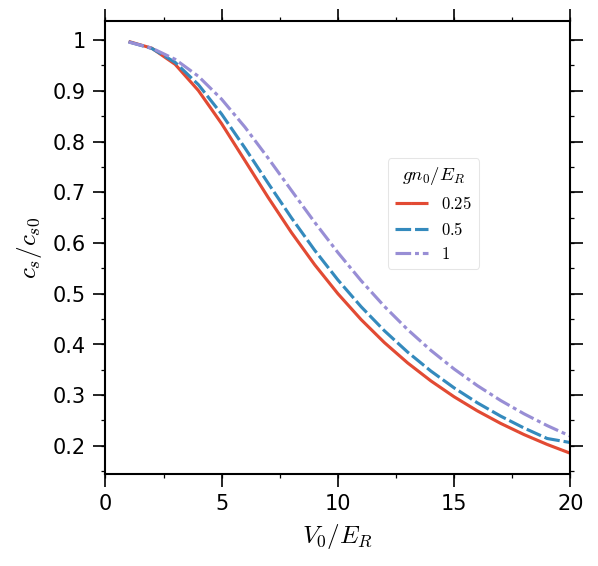

In [79]:
# Physical parameters
macro_kz = 0
bloch_band = 1

# %% Figure base style
set_base_style()

figure(figsize=(4, 4))

ax = gca()

rcParams['axes.linewidth'] = 0.5

dashes = cycle(DASHES)

# Switches
subplot_left = True
if subplot_left:
    add_legend = False
else:
    add_legend = True

 # Some dimensions
y_min = 0
y_max = 2

skip_ideal = False
# lc = None
system = systems[0]
gn0 = system.interaction_strength

for data_index in [0, 1, 2]:
    dash_ = next(dashes)
    edata = edata = all_energy_data[data_index]
    deriv_data_0 = find_energy_deriv(edata)
    gn0v = gn0_data[data_index]
    slope = array(deriv_data_0)[:, 1] / sqrt(gn0v / ER) / sqrt(2)
    line, = pyplot.plot(v0_range / ER, slope,
                        label=r'${:.5G}$'.format(gn0v/ER),
                       dashes=dash_)
#     lc = line.get_color()

# print(gn0 / ER)
# plt_lb = make_plot_label(v0 / ER, r, gn0 / ER)
# ax.text(-0.44, 0.80 * y_max, plt_lb, fontsize=11)

add_legend = True
if add_legend:
    legend_ = ax.legend(bbox_to_anchor=(0.59, 0.715), loc='best')
    leg_title = legend_.get_title()
    legend_.set_title(r'$gn_0 / E_R$', prop=dict(size=9))
    leg_frame = legend_.get_frame()
    setp(leg_frame, fc='#FFFFFF', alpha=0.5)
    

y_loc = MultipleLocator(0.1)
y_fmt = FormatStrFormatter('%.2G')
y_min_loc = MultipleLocator(0.05)

ax.yaxis.set_major_locator(y_loc)
ax.yaxis.set_major_formatter(y_fmt)
ax.yaxis.set_minor_locator(y_min_loc)

x_loc = MultipleLocator(5)
x_fmt = FormatStrFormatter('%.2G')
x_min_loc = MultipleLocator(2.5)

ax.xaxis.set_major_locator(x_loc)
ax.xaxis.set_major_formatter(x_fmt)
ax.xaxis.set_minor_locator(x_min_loc)


ax.set_xlabel(r'$V_0 / E_R$')
ax.set_ylabel(r'$c_s / c_{s0}$')

ax.set_xlim(0, 20)
# ax.set_ylim(y_min, y_max)

# Some manual labelling
# ax.set_xticks([-0.5, 0, .5])
# ax.set_xticklabels([-.5, '0', .5])

fn_fmt = r'sound-velocity[bdg]_r-{:.5G}'
file_name = fn_fmt.format(r)

full_path = os.path.join(proj_dir,
                         'reports', 'figures',
                         '{:s}.pdf'.format(file_name.replace('.', '-dot-')))

savefig(full_path)

print(full_path)

In [ ]:
bdg_band = bdg_spec.get(bloch_band=1)

plot(bdg_band.momentum, abs(bdg_band.energy.real / bdg_band.momentum))